## Clickbait headline analysis

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import datetime as dt
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize


In [2]:
abc = pd.read_csv('raw_data/abcnews-date-text.csv') #reputable news

In [3]:
exm = pd.read_csv('raw_data/examiner-date-text.csv') #clickbait

### Changing data types

In [4]:
abc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1226258 entries, 0 to 1226257
Data columns (total 2 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   publish_date   1226258 non-null  int64 
 1   headline_text  1226258 non-null  object
dtypes: int64(1), object(1)
memory usage: 18.7+ MB


In [5]:
exm.head()

,publish_date,headline_text
0,20100101,100 Most Anticipated books releasing in 2010
1,20100101,10 best films of 2009 - What's on your list?
2,20100101,10 days of free admission at Lan Su Chinese Ga...
3,20100101,10 PlayStation games to watch out for in 2010
4,20100101,10 resolutions for a Happy New Year for you an...


In [6]:
def change_dtype(df, column, new_dtype): #changes data type for df columns
    if df[column].dtype == new_dtype:
        print("Current dtype is the same as", new_dtype)
    elif new_dtype == 'datetime64[ns]':
        df[column] = pd.to_datetime(df[column], format='%Y%m%d')
        return(df)
    else:
        df[column] = df[column].astype(new_dtype)
        return(df)
        

In [7]:
change_dtype(abc,'publish_date','datetime64[ns]' )

,publish_date,headline_text
0,2003-02-19,aba decides against community broadcasting lic...
1,2003-02-19,act fire witnesses must be aware of defamation
2,2003-02-19,a g calls for infrastructure protection summit
3,2003-02-19,air nz staff in aust strike for pay rise
4,2003-02-19,air nz strike to affect australian travellers
...,...,...
1226253,2020-12-31,what abc readers learned from 2020 looking bac...
1226254,2020-12-31,what are the south african and uk variants of ...
1226255,2020-12-31,what victorias coronavirus restrictions mean f...
1226256,2020-12-31,whats life like as an american doctor during c...


In [8]:
change_dtype(abc,'headline_text','str' )

,publish_date,headline_text
0,2003-02-19,aba decides against community broadcasting lic...
1,2003-02-19,act fire witnesses must be aware of defamation
2,2003-02-19,a g calls for infrastructure protection summit
3,2003-02-19,air nz staff in aust strike for pay rise
4,2003-02-19,air nz strike to affect australian travellers
...,...,...
1226253,2020-12-31,what abc readers learned from 2020 looking bac...
1226254,2020-12-31,what are the south african and uk variants of ...
1226255,2020-12-31,what victorias coronavirus restrictions mean f...
1226256,2020-12-31,whats life like as an american doctor during c...


In [9]:
abc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1226258 entries, 0 to 1226257
Data columns (total 2 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   publish_date   1226258 non-null  datetime64[ns]
 1   headline_text  1226258 non-null  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 18.7+ MB


In [10]:
change_dtype(exm, 'publish_date', 'datetime64[ns]')
change_dtype(exm, 'headline_text', str)

,publish_date,headline_text
0,2010-01-01,100 Most Anticipated books releasing in 2010
1,2010-01-01,10 best films of 2009 - What's on your list?
2,2010-01-01,10 days of free admission at Lan Su Chinese Ga...
3,2010-01-01,10 PlayStation games to watch out for in 2010
4,2010-01-01,10 resolutions for a Happy New Year for you an...
...,...,...
3089776,2015-12-31,"Which is better investment, Lego bricks or gol..."
3089777,2015-12-31,Wild score three unanswered goals to defeat th...
3089778,2015-12-31,"With NASA and Russia on the sidelines, Europe ..."
3089779,2015-12-31,"Wolf Pack battling opponents, officials on the..."


In [11]:
exm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3089781 entries, 0 to 3089780
Data columns (total 2 columns):
 #   Column         Dtype         
---  ------         -----         
 0   publish_date   datetime64[ns]
 1   headline_text  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 47.1+ MB


In [12]:
abc.isna().any()

publish_date     False
headline_text    False
dtype: bool

In [13]:
exm.isna().any()

publish_date     False
headline_text    False
dtype: bool

## Joining dfs together

In [14]:
#adding new column to identify clickbait or not
abc['clickbait'] = 0
exm['clickbait'] = 1

In [35]:
abc.tail()

,publish_date,headline_text,clickbait
1002766,2015-12-31,wild dog 1080 baiting regulations relaxed for ...,0
1002767,2015-12-31,wild dogs bait program willem westra van holth...,0
1002768,2015-12-31,win tv could go black if nine impasse continues,0
1002769,2015-12-31,woolly sheep found stuck in culvert by farmer ...,0
1002770,2015-12-31,your favourite movies of 2015,0


In [34]:
exm.tail()

,publish_date,headline_text,clickbait
3089776,2015-12-31,"Which is better investment, Lego bricks or gol...",1
3089777,2015-12-31,Wild score three unanswered goals to defeat th...,1
3089778,2015-12-31,"With NASA and Russia on the sidelines, Europe ...",1
3089779,2015-12-31,"Wolf Pack battling opponents, officials on the...",1
3089780,2015-12-31,Writespace hosts all genre open mic night,1


In [17]:
#selecting only the years both dfs have in common
print(exm['publish_date'].min(), exm['publish_date'].max(), exm.shape)
low = exm['publish_date'].min()
high = exm['publish_date'].max()

abc = abc.loc[(abc['publish_date']>=low) & (abc['publish_date']<=high)]
print(abc['publish_date'].min(), abc['publish_date'].max(), abc.shape)

2010-01-01 00:00:00 2015-12-31 00:00:00 (3089781, 3)
2010-01-01 00:00:00 2015-12-31 00:00:00 (492466, 3)


In [18]:
#use concat to combine the two df
df = pd.concat([abc, exm], ignore_index=True)
df.head()

,publish_date,headline_text,clickbait
0,2010-01-01,12m degas stolen from museum,0
1,2010-01-01,17 die in bangladesh bus crash,0
2,2010-01-01,2010 to be drier after very wet 2009,0
3,2010-01-01,37 catholic workers killed worldwide,0
4,2010-01-01,600 hurt in philippine new year revelry,0


### Exploring

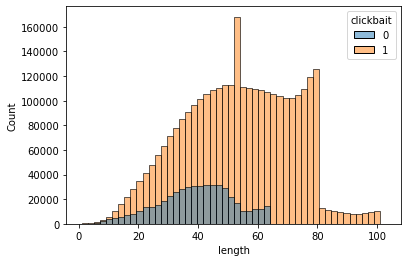

In [19]:
#comparing headline length 
# datasets are unblanced
df['length'] = df['headline_text'].str.len()
df.head()
sns.histplot(df,bins=50, x='length', hue='clickbait')

In [20]:
df.describe()

,clickbait,length
count,3.582247e+06,3.582247e+06
mean,8.625260e-01,5.165683e+01
std,3.443472e-01,1.820707e+01
min,0.000000e+00,1.000000e+00
25%,1.000000e+00,3.800000e+01
50%,1.000000e+00,5.100000e+01
75%,1.000000e+00,6.600000e+01
max,1.000000e+00,1.030000e+02


### Counting exclamations and question marks


In [33]:
df.tail(8)

,publish_date,headline_text,clickbait,length,contains_exclaim,contains_question,no_stop,num_stopwords,percent_stop
3582239,2015-12-31,"[wallethubs, 16, financial, resolutions, for, ...",1,53,0,0,"[wallethubs, 16, financial, resolutions, new, ...",2,0.250000
3582240,2015-12-31,"[what, did, we, learn, from, the, 49ers, in, 2...",1,41,0,1,"[learn, 49ers, 2015]",6,0.666667
3582241,2015-12-31,"[what, lies, ahead, for, hartford, hockey, in,...",1,44,0,1,"[lies, ahead, hartford, hockey, 2016]",3,0.375000
3582242,2015-12-31,"[which, is, better, investment, lego, bricks, ...",1,77,0,1,"[better, investment, lego, bricks, gold, brick...",4,0.333333
3582243,2015-12-31,"[wild, score, three, unanswered, goals, to, de...",1,53,0,0,"[wild, score, three, unanswered, goals, defeat...",2,0.222222
3582244,2015-12-31,"[with, nasa, and, russia, on, the, sidelines, ...",1,77,0,0,"[nasa, russia, sidelines, europe, leading, ret...",8,0.533333
3582245,2015-12-31,"[wolf, pack, battling, opponents, officials, o...",1,51,0,0,"[wolf, pack, battling, opponents, officials, r...",2,0.250000
3582246,2015-12-31,"[writespace, hosts, all, genre, open, mic, night]",1,41,0,0,"[writespace, hosts, genre, open, mic, night]",1,0.142857


In [23]:
def exclaim(headline): #Detects if a '!' is in the headline
    if '!' in headline:
        return 1
    else:
        return 0
    
df['contains_exclaim'] = df['headline_text'].apply(exclaim)
df.tail(10)

,publish_date,headline_text,clickbait,length,contains_exclaim
3582237,2015-12-31,Vaginal estrogen can improve postmenopausal se...,1,52,0
3582238,2015-12-31,Vegas fun in the 2015 Ford Mustang,1,34,0
3582239,2015-12-31,WalletHub's 16 Financial Resolutions for the N...,1,53,0
3582240,2015-12-31,What did we learn from the 49ers in 2015?,1,41,0
3582241,2015-12-31,What lies ahead for Hartford Hockey in 2016?,1,44,0
3582242,2015-12-31,"Which is better investment, Lego bricks or gol...",1,77,0
3582243,2015-12-31,Wild score three unanswered goals to defeat th...,1,53,0
3582244,2015-12-31,"With NASA and Russia on the sidelines, Europe ...",1,77,0
3582245,2015-12-31,"Wolf Pack battling opponents, officials on the...",1,51,0
3582246,2015-12-31,Writespace hosts all genre open mic night,1,41,0


In [24]:
def question(headline): #Detects if a '?' is in the headline
    if '?' in headline:
        return 1
    else:
        return 0
    
df['contains_question'] = df['headline_text'].apply(question)
df.tail(10)

,publish_date,headline_text,clickbait,length,contains_exclaim,contains_question
3582237,2015-12-31,Vaginal estrogen can improve postmenopausal se...,1,52,0,0
3582238,2015-12-31,Vegas fun in the 2015 Ford Mustang,1,34,0,0
3582239,2015-12-31,WalletHub's 16 Financial Resolutions for the N...,1,53,0,0
3582240,2015-12-31,What did we learn from the 49ers in 2015?,1,41,0,1
3582241,2015-12-31,What lies ahead for Hartford Hockey in 2016?,1,44,0,1
3582242,2015-12-31,"Which is better investment, Lego bricks or gol...",1,77,0,1
3582243,2015-12-31,Wild score three unanswered goals to defeat th...,1,53,0,0
3582244,2015-12-31,"With NASA and Russia on the sidelines, Europe ...",1,77,0,0
3582245,2015-12-31,"Wolf Pack battling opponents, officials on the...",1,51,0,0
3582246,2015-12-31,Writespace hosts all genre open mic night,1,41,0,0


### Removing punctuation and stop words

In [25]:
df["headline_text"] = df['headline_text'].str.replace('[^\w\s]','') #removing punctuation

In [26]:
df['headline_text'] = df['headline_text'].apply(lambda x: [y for y in x.lower().split()]) #splitting into words 

In [27]:
stop = stopwords.words('english')

df['no_stop'] = df['headline_text'].apply(lambda x:[y for y in x if y not in stop])

In [28]:
df.tail(10)

,publish_date,headline_text,clickbait,length,contains_exclaim,contains_question,no_stop
3582237,2015-12-31,"[vaginal, estrogen, can, improve, postmenopaus...",1,52,0,0,"[vaginal, estrogen, improve, postmenopausal, s..."
3582238,2015-12-31,"[vegas, fun, in, the, 2015, ford, mustang]",1,34,0,0,"[vegas, fun, 2015, ford, mustang]"
3582239,2015-12-31,"[wallethubs, 16, financial, resolutions, for, ...",1,53,0,0,"[wallethubs, 16, financial, resolutions, new, ..."
3582240,2015-12-31,"[what, did, we, learn, from, the, 49ers, in, 2...",1,41,0,1,"[learn, 49ers, 2015]"
3582241,2015-12-31,"[what, lies, ahead, for, hartford, hockey, in,...",1,44,0,1,"[lies, ahead, hartford, hockey, 2016]"
3582242,2015-12-31,"[which, is, better, investment, lego, bricks, ...",1,77,0,1,"[better, investment, lego, bricks, gold, brick..."
3582243,2015-12-31,"[wild, score, three, unanswered, goals, to, de...",1,53,0,0,"[wild, score, three, unanswered, goals, defeat..."
3582244,2015-12-31,"[with, nasa, and, russia, on, the, sidelines, ...",1,77,0,0,"[nasa, russia, sidelines, europe, leading, ret..."
3582245,2015-12-31,"[wolf, pack, battling, opponents, officials, o...",1,51,0,0,"[wolf, pack, battling, opponents, officials, r..."
3582246,2015-12-31,"[writespace, hosts, all, genre, open, mic, night]",1,41,0,0,"[writespace, hosts, genre, open, mic, night]"


Comparing the number of stop words each news site uses

[Text(0.5, 1.0, 'Number of stop words used')]

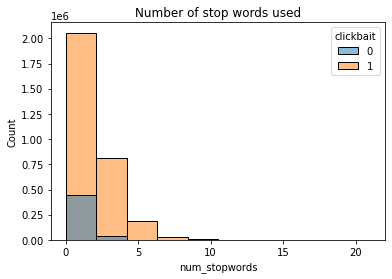

In [29]:
#finding the number of stop words
df['num_stopwords'] = (df['headline_text'].str.len())-(df['no_stop'].str.len())
sns.histplot(df,bins=10, x='num_stopwords', hue='clickbait').set(title = 'Number of stop words used')

[Text(0.5, 1.0, 'percentage of stop words used in each headline')]

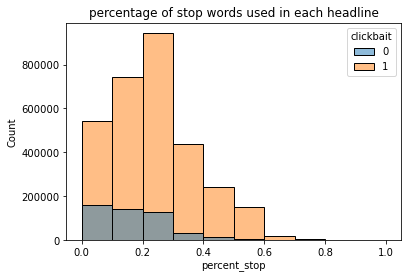

In [30]:
df['percent_stop'] = (df['num_stopwords'])/(df['headline_text'].str.len())
sns.histplot(df, bins=10, x='percent_stop', hue='clickbait').set(title='percentage of stop words used in each headline')

Looks like there isn't much difference in the amount of stop words used